# 🫀 Heart Disease Dataset

### 데이터 설명
이 심장 질환 데이터 세트는 이미 독립적으로 사용 가능하지만 이전에는 결합되지 않은 5개의 인기 심장 질환 데이터 세트를 결합하여 선별되었습니다. 이 데이터 세트에는 5개의 심장 데이터 세트가 11개의 공통 기능과 결합되어 있어 지금까지 연구 목적으로 사용할 수 있는 심장 질환 데이터 세트 중 가장 큰 것입니다. 큐레이션에 사용되는 5개의 데이터 세트는 다음과 같습니다.  
  
- 클리블랜드
- 헝가리 인
- 스위스
- 롱비치 버지니아
- Statlog(심장) 데이터 세트.
  
이 데이터 세트는 11가지 기능을 갖춘 1,190개의 인스턴스로 구성됩니다. 이러한 데이터 세트는 CAD 관련 기계 학습 및 데이터 마이닝 알고리즘에 대한 고급 연구를 돕고 궁극적으로 임상 진단 및 조기 치료를 발전시키기 위해 한곳에 수집 및 결합되었습니다.  
  
  

### 데이터 정보
#### Attribute & Description 
- age : 나이  
- Sex : 성별
    - 1 = male, 0= female; 
- Chest Pain Type : 흉통 유형
    - Value 1: typical angina  
    - Value 2: atypical angina  
    - Value 3: non-anginal pain  
    - Value 4: asymptomatic
- resting bp s : 안정시 혈압(s)
- cholesterol : 콜레스테롤  
- Fasting Blood sugar : 공복 혈당
    - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  
- Resting electrocardiogram results : 안정시 심전도    
    - Value 0: normal  
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- max heart rate: 최대 심박수  
- Exercise induced angina : 운동 유발성 협심증
    - 1 = yes; 0 = no
- oldpeak: ST 분절 하강  
- the slope of the peak exercise ST segment : ST 분절 기울기    
    - Value 1: upsloping  
    - Value 2: flat  
    - Value 3: downsloping  
- target: 목표
    - 1 = heart disease, 0 = Normal  
 


## import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import shap


## 데이터 로드

In [3]:
df = pd.read_csv("archive/heart_statlog_cleveland_hungary_final.csv")
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


## EDA

In [4]:
np.random.seed(42)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [6]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [7]:
df.duplicated().sum()

272

In [8]:
df.loc[df[df.duplicated(keep=False)].index]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
90,49,0,2,110,208,0,0,160,0,0.0,1,0
163,49,0,2,110,208,0,0,160,0,0.0,1,0
556,58,1,3,150,219,0,1,118,1,0.0,2,1
604,58,1,3,150,219,0,1,118,1,0.0,2,1
617,70,1,4,130,322,0,2,109,0,2.4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,42,1,3,130,180,0,0,150,0,0.0,1,0
1157,61,1,4,140,207,0,2,138,1,1.9,1,1
1158,66,1,4,160,228,0,2,138,0,2.3,1,0
1159,46,1,4,140,311,0,0,120,1,1.8,2,1


In [9]:
df.loc[df[df.duplicated()].index] # 데이터 확장을 위한 중복 데이터인지 아니면 지를 확실하게 알 수 가 없다. 일단 두 개로 나누어서 성능 비교 후 

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
163,49,0,2,110,208,0,0,160,0,0.0,1,0
604,58,1,3,150,219,0,1,118,1,0.0,2,1
887,63,1,1,145,233,1,2,150,0,2.3,3,0
888,67,1,4,160,286,0,2,108,1,1.5,2,1
889,67,1,4,120,229,0,2,129,1,2.6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,42,1,3,130,180,0,0,150,0,0.0,1,0
1157,61,1,4,140,207,0,2,138,1,1.9,1,1
1158,66,1,4,160,228,0,2,138,0,2.3,1,0
1159,46,1,4,140,311,0,0,120,1,1.8,2,1


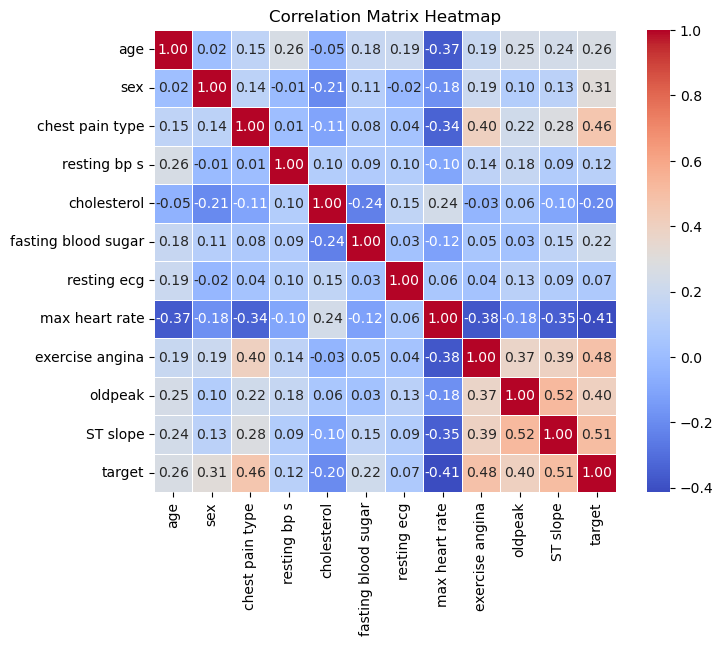

In [10]:
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [11]:
# 중복값을 삭제하지 않은 값
df_nodd = df.copy()

In [12]:
# 원본 데이터는 중복값을 지운 것을 사용
df = df.drop_duplicates(keep='first', ignore_index=True)
df.duplicated().sum()

0

In [13]:
df.shape

(918, 12)

In [14]:
df.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [15]:
df.tail(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
908,63,1,4,140,187,0,2,144,1,4.0,1,1
909,63,0,4,124,197,0,0,136,1,0.0,2,1
910,41,1,2,120,157,0,0,182,0,0.0,1,0
911,59,1,4,164,176,1,2,90,0,1.0,2,1
912,57,0,4,140,241,0,0,123,1,0.2,2,1
913,45,1,1,110,264,0,0,132,0,1.2,2,1
914,68,1,4,144,193,1,0,141,0,3.4,2,1
915,57,1,4,130,131,0,0,115,1,1.2,2,1
916,57,0,2,130,236,0,2,174,0,0.0,2,1
917,38,1,3,138,175,0,0,173,0,0.0,1,0


max :  77 | min :  28
평균 값 :  53.51


Text(0.5, 0, 'age')

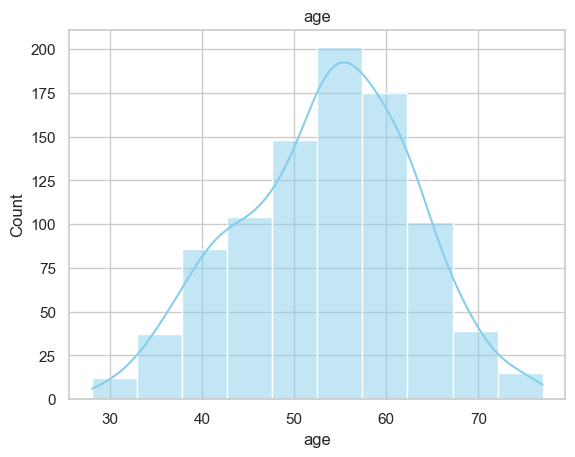

In [16]:
# age 데이터 값의 이상치 확인
print("max : " , df.age.max() , "| min : " , df.age.min())
print("평균 값 : ", df.age.mean().round(2))
sns.set(style="whitegrid")
sns.histplot(df["age"], kde=True, color="skyblue", bins=10)
plt.title("age")
plt.xlabel("age")

In [17]:
def checkOutlier(data, col, bin=30):
    print("Max : ", data[col].max(), "| Min : ", data[col].min())
    print("Mean : ", data[col].mean())
    print("Std : ", data[col].std())
    sns.set(style="whitegrid")
    sns.histplot(data[col], kde=True, color="skyblue", bins=bin)

In [18]:
def detect_outliers(df, column):
    # 데이터와 컬럼 이름 검증
    if column not in df.columns:
        raise ValueError(f"{column} is not a column in the dataframe")
    if not pd.api.types.is_numeric_dtype(df[column]):
        raise TypeError(f"{column} must be a numeric column")

    data = df[column]
    
    # Z-점수 기반 이상치 탐지
    z_scores = np.abs((data - data.mean()) / data.std())
    outliers_z = data[z_scores > 3]
    
    # IQR 기반 이상치 탐지
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = data[(data < lower_bound) | (data > upper_bound)]
    
    # 결과 출력
    print("Outliers using Z-score method:")
    print(outliers_z)
    print("\nOutliers using IQR method:")
    print(outliers_iqr)
    
    # 박스 플롯으로 시각화
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.boxplot(data, vert=False)
    plt.title("Box Plot")
    
    plt.subplot(1, 2, 2)
    plt.hist(data, bins=30, edgecolor='black')
    plt.scatter(outliers_iqr, np.zeros_like(outliers_iqr) - 0.005, color='red', s=100, label='IQR Outliers')
    plt.scatter(outliers_z, np.zeros_like(outliers_z) - 0.01, color='blue', s=50, label='Z-score Outliers')
    plt.legend()
    plt.title("Histogram with Outliers")
    
    plt.show()

Max :  77 | Min :  28
Mean :  53.510893246187365
Std :  9.432616506732007


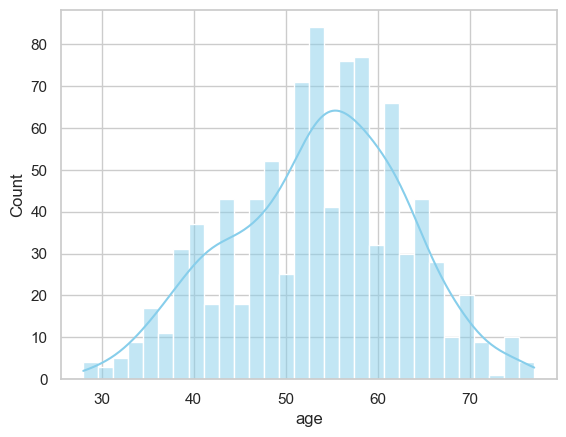

In [19]:
checkOutlier(df,"age")

Outliers using Z-score method:
Series([], Name: age, dtype: int64)

Outliers using IQR method:
Series([], Name: age, dtype: int64)


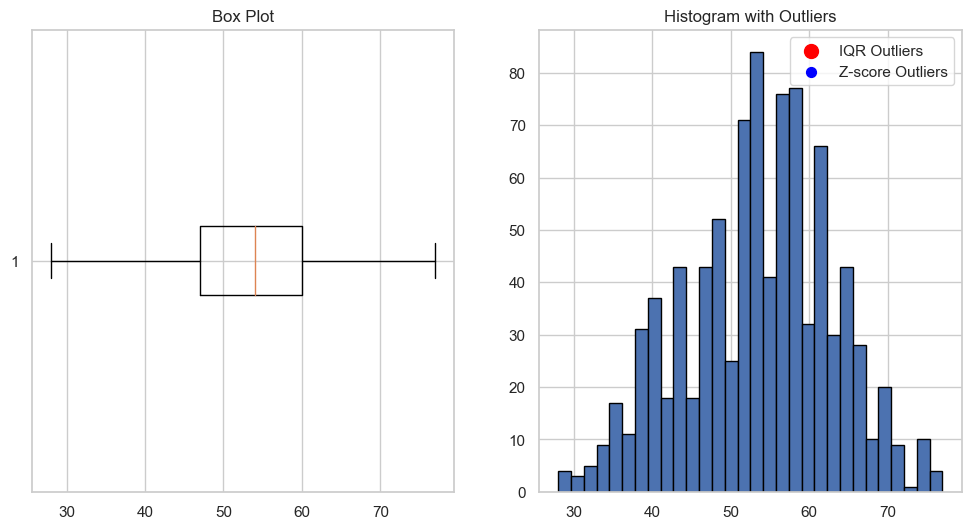

In [20]:
detect_outliers(df,"age")

sex
1    725
0    193
Name: count, dtype: int64
sex
1    0.79
0    0.21
Name: proportion, dtype: float64


<Axes: xlabel='sex'>

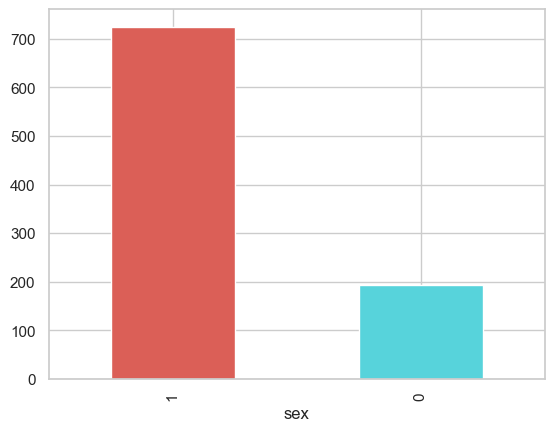

In [21]:
# sex 데이터 값 확인
print(df.sex.value_counts())
print(df.sex.value_counts(normalize=True).round(2))
colors = sns.color_palette('hls',2)
# 1 = male, 0= female;
df.sex.value_counts().plot(kind="bar",color=colors)
# 성비가 불균형 적인 문제가 있다. 해당 비율을 고정적으로 하여 tain set과 text set을 나누어야 한다.

In [22]:
# Chest Pain Type
""" 
    - Value 1: typical angina  협심증
    - Value 2: atypical angina  비전형적인 협심증
    - Value 3: non-anginal pain  비협심증성 통증
    - Value 4: asymptomatic 무증상
"""
df["chest pain type"].value_counts()

chest pain type
4    496
3    203
2    173
1     46
Name: count, dtype: int64

Max :  200 | Min :  0
Mean :  132.39651416122004
Std :  18.514154119907808


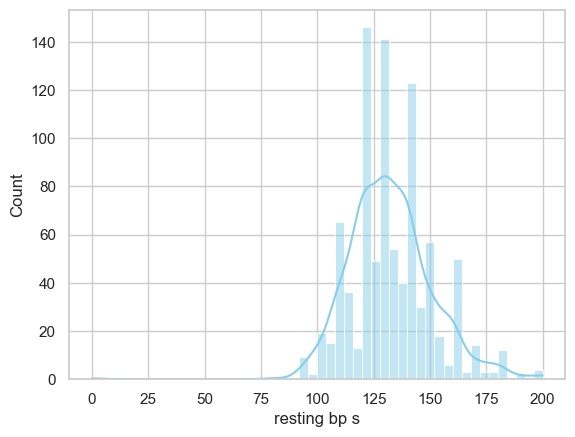

In [23]:
# resting bp s
checkOutlier(df, "resting bp s", 50)

Outliers using Z-score method:
109    190
241    200
365    200
399    200
449      0
592    190
732    200
759    192
Name: resting bp s, dtype: int64

Outliers using IQR method:
109    190
123    180
189    180
190    180
241    200
274    180
275    180
278    180
314     80
365    200
372    185
399    200
411    180
423    180
449      0
475    178
550    172
585    180
592    190
673    174
702    178
725    180
732    200
759    192
774    178
780    180
855    180
880    172
Name: resting bp s, dtype: int64


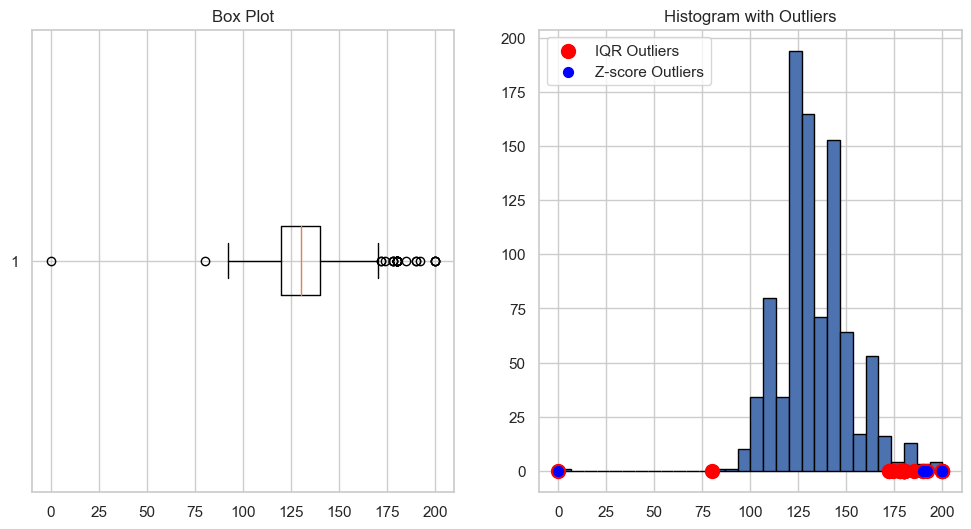

In [24]:
detect_outliers(df, "resting bp s")

In [25]:
df[df["resting bp s"] <= 60] # 인간의 혈압이 0인 경우는 죽은 사람에 경우 이다. 해당 데이터는 그 외에도 0인 것이 많으로 삭제한다.

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
449,55,1,3,0,0,0,0,155,0,1.5,2,1


In [26]:
# 이상치 제거
df = df.drop(index=df[df["resting bp s"] <= 60].index, axis=0).reset_index(drop=True)
df[df["resting bp s"] <= 60]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target


Max :  200 | Min :  80
Mean :  132.54089422028352
Std :  17.99974879939768


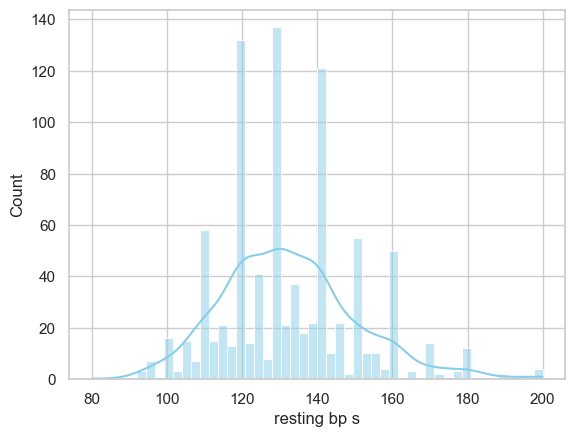

In [27]:
checkOutlier(df, "resting bp s", 50)

Outliers using Z-score method:
109    190
241    200
365    200
399    200
591    190
731    200
758    192
Name: resting bp s, dtype: int64

Outliers using IQR method:
109    190
123    180
189    180
190    180
241    200
274    180
275    180
278    180
314     80
365    200
372    185
399    200
411    180
423    180
474    178
549    172
584    180
591    190
672    174
701    178
724    180
731    200
758    192
773    178
779    180
854    180
879    172
Name: resting bp s, dtype: int64


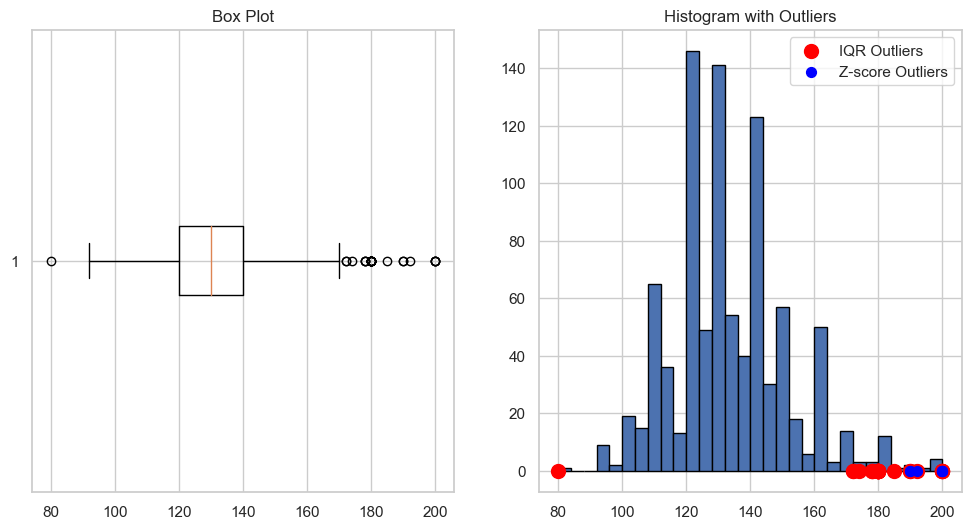

In [28]:
detect_outliers(df, "resting bp s")

Max :  603 | Min :  0
Mean :  199.0163576881134
Std :  109.24633014048783


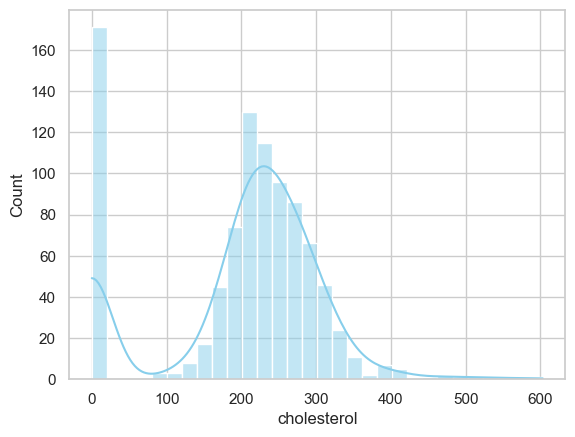

In [29]:
# cholesterol
checkOutlier(df,"cholesterol")

Outliers using Z-score method:
76     529
149    603
615    564
Name: cholesterol, dtype: int64

Outliers using IQR method:
28     468
30     518
69     412
76     529
103    466
      ... 
535      0
615    564
623    407
666    417
795    409
Name: cholesterol, Length: 183, dtype: int64


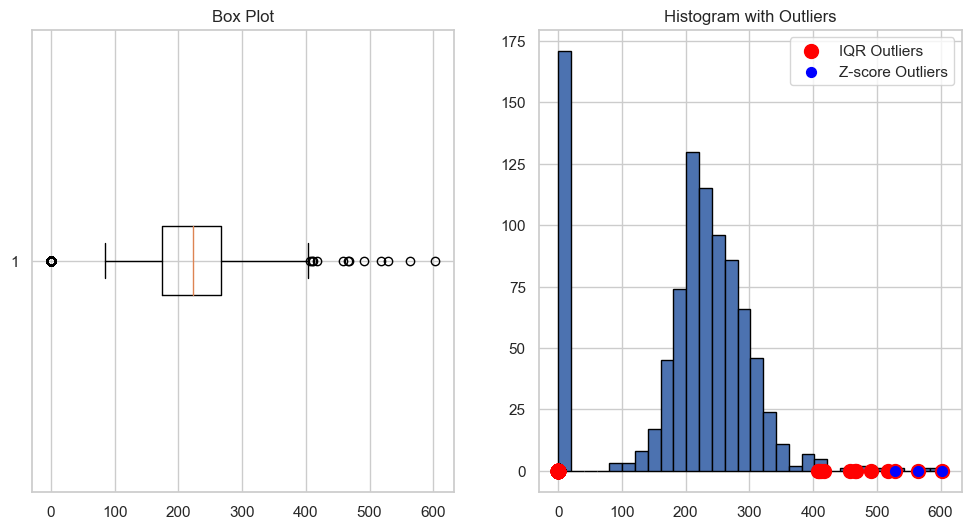

In [30]:
detect_outliers(df, "cholesterol")

In [31]:
df[df["cholesterol"] < 99]["cholesterol"].value_counts()

cholesterol
0     171
85      1
Name: count, dtype: int64

In [32]:
# 데이터가 생각보다 많으며 만약 다른 데이터와 연관관계 분석 후 해당 데이터를 지우거나 평균값을 데체하여 수정한다.
df[df["cholesterol"] == 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
293,65,1,4,115,0,0,0,93,1,0.0,2,1
294,32,1,1,95,0,1,0,127,0,0.7,1,1
295,61,1,4,105,0,1,0,110,1,1.5,1,1
296,50,1,4,145,0,1,0,139,1,0.7,2,1
297,57,1,4,110,0,1,1,131,1,1.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
513,43,1,4,122,0,0,0,120,0,0.5,1,1
514,63,1,3,130,0,1,1,160,0,3.0,2,0
517,48,1,3,102,0,1,1,110,1,1.0,3,1
534,56,1,4,130,0,0,2,122,1,1.0,2,1


fasting blood sugar
0    703
1    214
Name: count, dtype: int64


<Axes: xlabel='fasting blood sugar'>

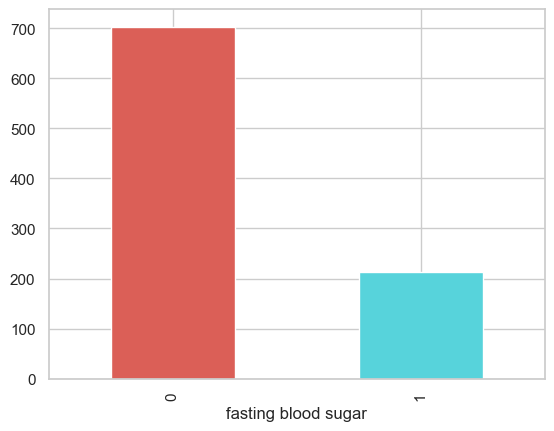

In [33]:
# fasting blood sugar
print(df["fasting blood sugar"].value_counts())
df["fasting blood sugar"].value_counts().plot(kind="bar",color=colors)
# (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 1 => 당뇨 환자

resting ecg
0    551
2    188
1    178
Name: count, dtype: int64


<Axes: xlabel='resting ecg'>

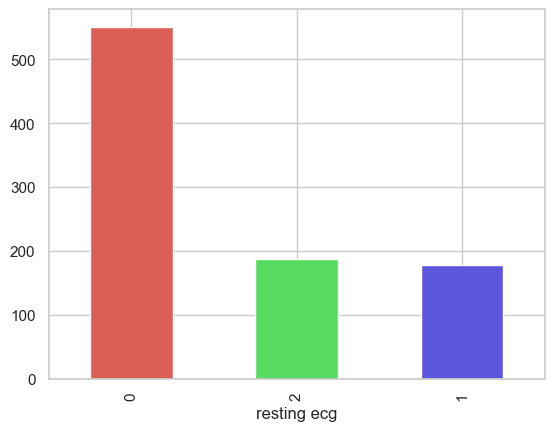

In [34]:
# resting ecg
"""
Value 0: normal  
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
"""
print(df["resting ecg"].value_counts())
colors = sns.color_palette('hls',3)
df["resting ecg"].value_counts().plot(kind="bar",color=colors)


Max :  202 | Min :  60
Mean :  136.78953107960743
Std :  25.467128815541507


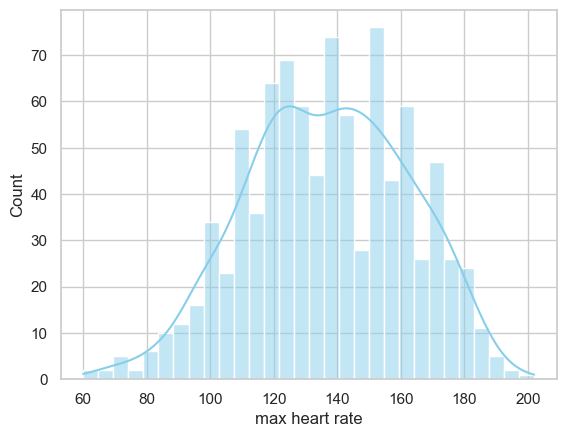

In [35]:
# max heart rate
checkOutlier(df,"max heart rate")

exercise angina
0    546
1    371
Name: count, dtype: int64


<Axes: xlabel='exercise angina'>

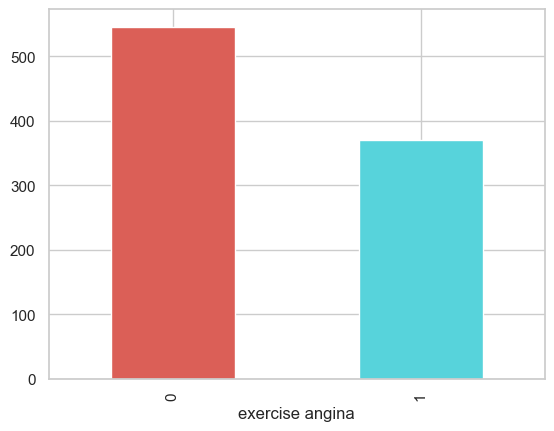

In [36]:
# exercise angina 운동 유발성 협심증
# 1 = yes; 0 = no
""" 
"운동 유발성 협심증"은 심장에 충분한 산소가 공급되지 않을 때 발생하는 흉통(가슴 통증)의 일종입니다. 운동이나 심한 신체 활동 동안 심장은 더 많은 산소를 필요로 하기 때문에, 혈관이 좁아져 있거나 막혀 있으면 적절한 양의 혈액이 심장으로 흘러 들어가지 못해 통증을 유발합니다.

운동 유발성 협심증의 주요 특징:
통증의 성격: 일반적으로 가슴 중앙에 불편함이나 압박감, 답답함, 무거움 등의 형태로 느껴집니다.
통증의 위치: 통증은 가슴뿐만 아니라 목, 턱, 어깨, 등 또는 팔로 퍼질 수 있습니다.
발생 시기: 주로 신체 활동 중에 발생하며, 활동을 멈추면 통증이 사라지는 경향이 있습니다.
기타 증상: 호흡곤란, 식은땀, 메스꺼움 등이 동반될 수 있습니다.

진단 및 관리
진단: 운동부하 검사, 관상동맥 조영술, 심장 초음파 등을 통해 진단할 수 있습니다.
관리: 생활 습관의 변경, 약물 치료, 때로는 관상동맥 개입술이나 우회 수술이 필요할 수 있습니다.
운동 유발성 협심증은 심혈관 질환의 경고 신호로 볼 수 있으므로, 이 증상이 나타나면 즉시 의학적 조언을 구하는 것이 중요합니다. 이는 심장에 지속적인 손상을 방지하고, 더 심각한 심장 사건을 예방할 수 있도록 도와줍니다.
"""

print(df["exercise angina"].value_counts())
colors = sns.color_palette('hls',2)
df["exercise angina"].value_counts().plot(kind="bar",color=colors)

Max :  6.2 | Min :  -2.6
Mean :  0.8866957470010904
Std :  1.0669599756520682


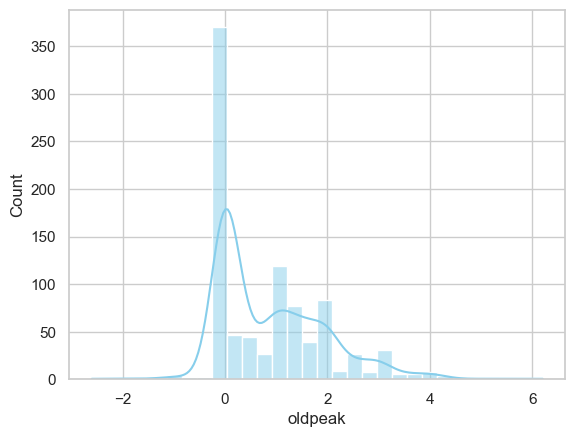

In [37]:
# oldpeak
checkOutlier(df,"oldpeak")

In [38]:
df[df["oldpeak"] <= 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
2,37,1,2,130,283,0,1,98,0,0.0,1,0
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,56,1,2,120,240,0,0,169,0,0.0,3,0
908,63,0,4,124,197,0,0,136,1,0.0,2,1
909,41,1,2,120,157,0,0,182,0,0.0,1,0
915,57,0,2,130,236,0,2,174,0,0.0,2,1


ST slope
2    458
1    395
3     63
0      1
Name: count, dtype: int64


<Axes: xlabel='ST slope'>

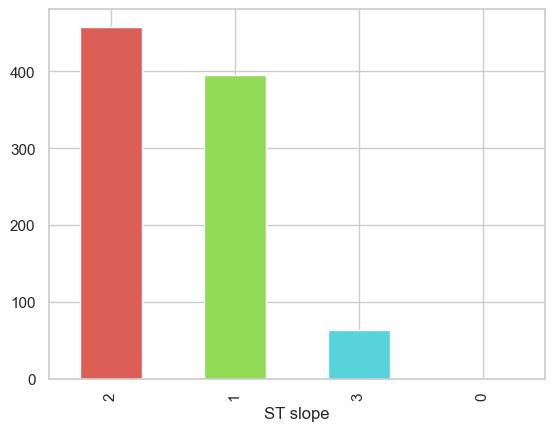

In [39]:
# ST slope
""" 
Value 1: upsloping  
Value 2: flat  
Value 3: downsloping  
"""
print(df["ST slope"].value_counts())
colors = sns.color_palette('hls',4)
df["ST slope"].value_counts().plot(kind="bar",color=colors)

In [40]:
# 목록에 없는 데이터를 가지고 있어 삭제함
df[df["ST slope"] == 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
515,68,1,3,150,195,1,0,132,0,0.0,0,1


In [41]:
df = df.drop(index=df[df["ST slope"] == 0].index, axis=0).reset_index(drop=True)
df[df["ST slope"] == 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target


target
1    506
0    410
Name: count, dtype: int64
target
1    0.552402
0    0.447598
Name: proportion, dtype: float64


<Axes: xlabel='target'>

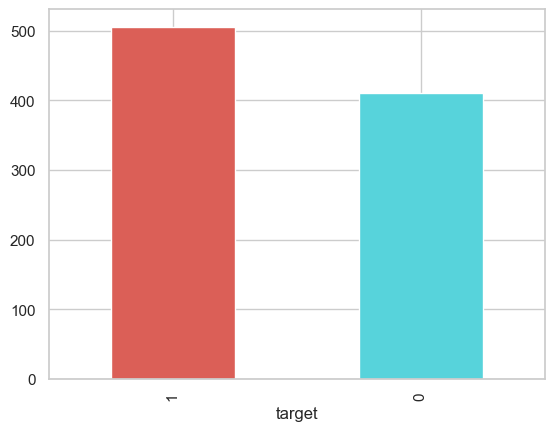

In [42]:
# target
print(df["target"].value_counts())
print(df["target"].value_counts(normalize=True))
colors = sns.color_palette('hls',2)
df["target"].value_counts().plot(kind="bar",color=colors)
# target 비율은 동일하므로 현 비율을 유지하면서 

## 데이터가 없는 이상치 문제
- 해결 방법
    1. 그대로 사용
    2. 평균값을 임의로 삽입
    3. 데이터를 삭제하고 사용
- 2안 문제점
    - 평균 값으로 대체하면 평균 값이 급격하게 올라가는 문제가 생김 -> 데이터에 영향을 주는 것이 된다.
- 해결 방법
    - 평균 값은 유지되고 target 비율에 맞게 데이터를 넣는다.
    - target 비율을 유지하면서 인덱스를 3개의 그룹으로 나눈다. -> 나중에 머신러닝 학습 시 학습 데이터 나누는 것을 생각해서
    - 정규 분포 값을 3개의 그룹에 인덱스에 무작위 대흥을 시킨다.
    - 데이터프레임에는 apply을 이용해 인덱스에 값을 가져와서 넣는다.
- 지적점
    - 무작위로 데이터를 집어 넣는 것은 위험하지 않는가?
        - 해당 컬럼은 다른 컬럼들과의 상관관계가 낮음으로 최대한 평균과 target 데이터의 비율에 최대한 영향을 주지 않는 만큼으로 데이터를 조정
        - 최대한 랜덤성을 부여한다.
        

In [43]:
df[df["cholesterol"] == 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
293,65,1,4,115,0,0,0,93,1,0.0,2,1
294,32,1,1,95,0,1,0,127,0,0.7,1,1
295,61,1,4,105,0,1,0,110,1,1.5,1,1
296,50,1,4,145,0,1,0,139,1,0.7,2,1
297,57,1,4,110,0,1,1,131,1,1.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
513,43,1,4,122,0,0,0,120,0,0.5,1,1
514,63,1,3,130,0,1,1,160,0,3.0,2,0
516,48,1,3,102,0,1,1,110,1,1.0,3,1
533,56,1,4,130,0,0,2,122,1,1.0,2,1


In [44]:
df_chol = df.copy() # 그대로 사용
df_nochol = df.drop(index=df[df["cholesterol"] == 0].index, axis=0).reset_index(drop=True) # 해당 데이터 삭제

Max :  603 | Min :  0
Mean :  199.0207423580786
Std :  109.30593055516376


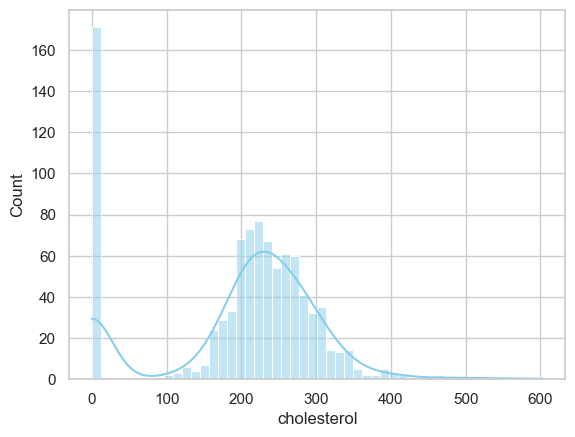

In [45]:
checkOutlier(df_chol, "cholesterol", 50)

Max :  603 | Min :  85
Mean :  244.7020134228188
Std :  59.165248888585


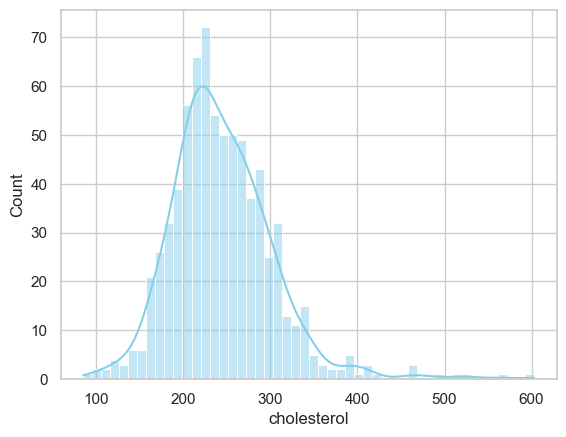

In [46]:
checkOutlier(df_nochol, "cholesterol", 50)

Max :  603 | Min :  85
Mean :  236.1703056768559
Std :  56.24769024828602


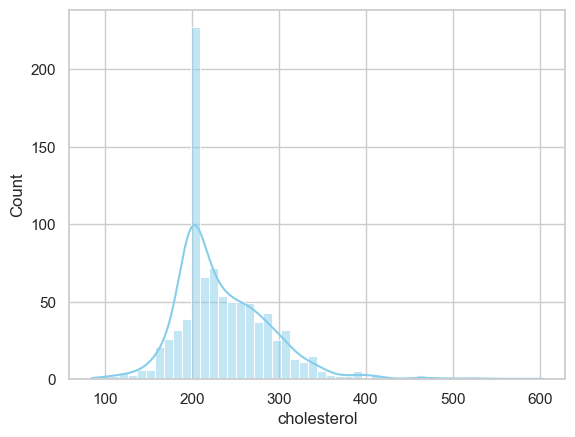

In [47]:
df_mean = df.copy()
cholemean= int(df_mean["cholesterol"].mean())
df_mean["cholesterol"] = df_mean["cholesterol"].apply(lambda x: cholemean if x == 0 else x)
checkOutlier(df_mean,"cholesterol",50)

In [48]:
df[df["cholesterol"]==0]["target"].value_counts()

target
1    151
0     20
Name: count, dtype: int64

Max :  603 | Min :  85
Mean :  235.0174672489083
Std :  68.80163710503005


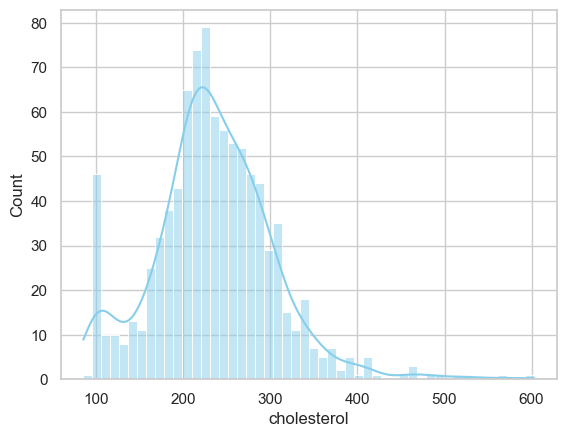

In [49]:
df_pre = df.copy() # 평균, 표준편차, 타겟 비율에 의한 값

class_stats = df.groupby('target')['cholesterol'].agg(['mean', 'std'])

def replace_outlier(row, stats):
    if row['cholesterol'] == 0:
        mean = stats.loc[row['target'], 'mean']
        std = stats.loc[row['target'], 'std']
        return int(np.clip(np.random.normal(mean, std), 100, 500))
    else:
        return int(row['cholesterol'])

df_pre["cholesterol"] = df_pre.apply(replace_outlier, args=(class_stats,), axis=1)

checkOutlier(df_pre, "cholesterol", 50)

## 모델 학습
### 데이터 분류 
데이터 이상치 처리 과정에서 3개의 데이터프레임 유형이 나왔다. 이 프로젝트에서 이상치 처리에서 좀 더 이상적인 것이 무엇지에 대해서 알아보기 위해 3개의 데이터프레임 모두 사용하여 데이터를 학습시켜서 학습률을 비교할 생각이다.

In [50]:
def splitTrainTestVal(data, target):
    print("DataFrame Shape : " , data.shape)
    Y = data[target]
    X = data.drop(columns=[target], axis=1)
    x, x_test, y, y_test = train_test_split(X, Y , test_size = 0.25, random_state = 42, stratify = Y)
    x_train, x_val, y_train, y_val = train_test_split(x, y , test_size = 0.25, random_state = 42, stratify = y)

    print("Train Shape :  X =", x_train.shape, "Y =", y_train.shape)
    print("Val Shape :  X =", x_val.shape, "Y =", y_val.shape)
    print("Test Shape :  X =", x_test.shape, "Y =", y_test.shape)

    # x train, val, test -> y train, val, test
    return x_train, x_val, x_test, y_train, y_val, y_test

In [51]:
# 데이터 이상치 제거하지 않은 것
df_chol.head(10)

xc_tain, xc_val, xc_teat, yc_tain, yc_val, yc_test = splitTrainTestVal(df_chol,"target")

DataFrame Shape :  (916, 12)
Train Shape :  X = (515, 11) Y = (515,)
Val Shape :  X = (172, 11) Y = (172,)
Test Shape :  X = (229, 11) Y = (229,)


In [52]:
# 데이터 이상치 제거한 것
df_nochol.head(10)

xn_tain, xn_val, xn_teat, yn_tain, yn_val , yn_test = splitTrainTestVal(df_nochol,"target")

DataFrame Shape :  (745, 12)
Train Shape :  X = (418, 11) Y = (418,)
Val Shape :  X = (140, 11) Y = (140,)
Test Shape :  X = (187, 11) Y = (187,)


In [53]:
# 평균과 표준편차, 타겟 비율을 고려하여 이상치를 대체한 것
df_pre.head(10)

xp_tain, xp_val, xp_teat, yp_tain, yp_val , yp_test = splitTrainTestVal(df_pre,"target")

DataFrame Shape :  (916, 12)
Train Shape :  X = (515, 11) Y = (515,)
Val Shape :  X = (172, 11) Y = (172,)
Test Shape :  X = (229, 11) Y = (229,)


In [54]:
# 평균으로 이상치 대체한 것
df_mean

xm_tain, xm_val, xm_teat, ym_tain, ym_val, ym_test = splitTrainTestVal(df_mean,"target")

DataFrame Shape :  (916, 12)
Train Shape :  X = (515, 11) Y = (515,)
Val Shape :  X = (172, 11) Y = (172,)
Test Shape :  X = (229, 11) Y = (229,)


### 데이터 모델 학습
#### 머신러닝
- 사용한 모델 종류
1. DecisionTreeClassifier (결정 트리 분류기):
    - 결정 트리는 데이터의 특성을 기반으로 결정 경로를 트리 구조로 나타내어 결과를 예측하는 모델입니다. 각 노드는 하나의 특성에 대한 결정(예/아니오)을 나타내고, 이를 통해 데이터를 분류합니다.
2. RandomForestClassifier (랜덤 포레스트 분류기):
    - 랜덤 포레스트는 여러 결정 트리를 조합해서 사용하는 앙상블 학습 방법입니다. 각각의 트리는 데이터의 부분 집합을 무작위로 선택하여 학습하며, 최종 결정은 각 트리의 예측을 평균내어 결정합니다.
3. XGBClassifier (XGBoost 분류기):
    - XGBoost는 향상된 그라디언트 부스팅 알고리즘으로, 여러 약한 학습기(주로 결정 트리)를 순차적으로 학습하여 강력한 예측 모델을 만드는 방식입니다. 각 단계에서 이전 모델의 오류를 줄이는 방향으로 학습합니다.
4. LogisticRegression (로지스틱 회귀):
    - 로지스틱 회귀는 분류를 위해 사용되는 선형 모델입니다. 결과가 두 가지 중 하나로 분류되는 이진 분류 문제에 주로 사용됩니다. 결과는 로지스틱 함수를 사용하여 확률로 표현됩니다.

In [55]:
# 기준 모델 제작
base_c = yc_tain.mode()[0]
base_n = yn_tain.mode()[0]
base_p = yp_tain.mode()[0]
base_m = ym_tain.mode()[0]

baseline_c = len(yc_tain) * [base_c] 
baseline_n = len(yn_tain) * [base_n]
baseline_p = len(yp_tain) * [base_p]
baseline_m = len(ym_tain) * [base_m]

baseline_acc_c = accuracy_score(yc_tain, baseline_c)
baseline_acc_n = accuracy_score(yn_tain, baseline_n)
baseline_acc_p = accuracy_score(yp_tain, baseline_p)
baseline_acc_m = accuracy_score(ym_tain, baseline_m)

In [56]:
print(f'기준모델의 정확도는 {baseline_acc_c.round(3)} 입니다')
print(classification_report(yc_tain, baseline_c))

기준모델의 정확도는 0.553 입니다
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       230
           1       0.55      1.00      0.71       285

    accuracy                           0.55       515
   macro avg       0.28      0.50      0.36       515
weighted avg       0.31      0.55      0.39       515



In [57]:
print(f'기준모델의 정확도는 {baseline_acc_n.round(3)} 입니다')
print(classification_report(yn_tain, baseline_n))

기준모델의 정확도는 0.524 입니다
              precision    recall  f1-score   support

           0       0.52      1.00      0.69       219
           1       0.00      0.00      0.00       199

    accuracy                           0.52       418
   macro avg       0.26      0.50      0.34       418
weighted avg       0.27      0.52      0.36       418



In [58]:
print(f'기준모델의 정확도는 {baseline_acc_p.round(3)} 입니다')
print(classification_report(yp_tain, baseline_p))

기준모델의 정확도는 0.553 입니다
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       230
           1       0.55      1.00      0.71       285

    accuracy                           0.55       515
   macro avg       0.28      0.50      0.36       515
weighted avg       0.31      0.55      0.39       515



In [59]:
print(f'기준모델의 정확도는 {baseline_acc_m.round(3)} 입니다')
print(classification_report(ym_tain, baseline_m))

기준모델의 정확도는 0.553 입니다
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       230
           1       0.55      1.00      0.71       285

    accuracy                           0.55       515
   macro avg       0.28      0.50      0.36       515
weighted avg       0.31      0.55      0.39       515



In [60]:
# 로지스틱 회귀
logistic_model = LogisticRegression(C=1.0, solver='liblinear', penalty='l2', max_iter=100)
logistic_model.fit(xc_tain, yc_tain)
log_pred_c = logistic_model.predict(xc_val)

print(confusion_matrix(yc_val, log_pred_c))
print(classification_report(yc_val, log_pred_c))

[[63 14]
 [ 8 87]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        77
           1       0.86      0.92      0.89        95

    accuracy                           0.87       172
   macro avg       0.87      0.87      0.87       172
weighted avg       0.87      0.87      0.87       172



In [61]:
logistic_model2 = LogisticRegression(C=1.0, solver='liblinear', penalty='l2', max_iter=100)
logistic_model2.fit(xn_tain, yn_tain)
log_pred_n = logistic_model2.predict(xn_val)

print(confusion_matrix(yn_val, log_pred_n))
print(classification_report(yn_val, log_pred_n))

[[62 11]
 [11 56]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        73
           1       0.84      0.84      0.84        67

    accuracy                           0.84       140
   macro avg       0.84      0.84      0.84       140
weighted avg       0.84      0.84      0.84       140



In [62]:
logistic_model3 = LogisticRegression(C=1.0, solver='liblinear', penalty='l2', max_iter=100)
logistic_model3.fit(xp_tain, yp_tain)
log_pred_p = logistic_model3.predict(xp_val)

print(confusion_matrix(yp_val, log_pred_p))
print(classification_report(yp_val, log_pred_p))

[[63 14]
 [10 85]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        77
           1       0.86      0.89      0.88        95

    accuracy                           0.86       172
   macro avg       0.86      0.86      0.86       172
weighted avg       0.86      0.86      0.86       172



In [63]:
logistic_model4 = LogisticRegression(C=1.0, solver='liblinear', penalty='l2', max_iter=100)
logistic_model4.fit(xm_tain, ym_tain)
log_pred_m = logistic_model4.predict(xm_val)

print(confusion_matrix(ym_val, log_pred_m))
print(classification_report(ym_val, log_pred_m))

[[63 14]
 [ 9 86]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        77
           1       0.86      0.91      0.88        95

    accuracy                           0.87       172
   macro avg       0.87      0.86      0.86       172
weighted avg       0.87      0.87      0.87       172



In [64]:
# 결정 트리
decision_tree_model1 = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5)
decision_tree_model1.fit(xc_tain, yc_tain)
dec_pred_c = decision_tree_model1.predict(xc_val)

print(confusion_matrix(yc_val, dec_pred_c))
print(classification_report(yc_val, dec_pred_c))

[[56 21]
 [ 8 87]]
              precision    recall  f1-score   support

           0       0.88      0.73      0.79        77
           1       0.81      0.92      0.86        95

    accuracy                           0.83       172
   macro avg       0.84      0.82      0.83       172
weighted avg       0.84      0.83      0.83       172



In [65]:
decision_tree_model2 = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5)
decision_tree_model2.fit(xn_tain, yn_tain)
dec_pred_n = decision_tree_model2.predict(xn_val)

print(confusion_matrix(yn_val, dec_pred_n))
print(classification_report(yn_val, dec_pred_n))

[[59 14]
 [ 6 61]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        73
           1       0.81      0.91      0.86        67

    accuracy                           0.86       140
   macro avg       0.86      0.86      0.86       140
weighted avg       0.86      0.86      0.86       140



In [66]:
decision_tree_model3 = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5)
decision_tree_model3.fit(xp_tain, yp_tain)
dec_pred_p = decision_tree_model3.predict(xp_val)

print(confusion_matrix(yp_val, dec_pred_p))
print(classification_report(yp_val, dec_pred_p))

[[59 18]
 [ 8 87]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        77
           1       0.83      0.92      0.87        95

    accuracy                           0.85       172
   macro avg       0.85      0.84      0.84       172
weighted avg       0.85      0.85      0.85       172



In [67]:
decision_tree_model4 = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5)
decision_tree_model4.fit(xm_tain, ym_tain)
dec_pred_m = decision_tree_model4.predict(xm_val)

print(confusion_matrix(ym_val, dec_pred_m))
print(classification_report(ym_val, dec_pred_m))

[[62 15]
 [ 8 87]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.84        77
           1       0.85      0.92      0.88        95

    accuracy                           0.87       172
   macro avg       0.87      0.86      0.86       172
weighted avg       0.87      0.87      0.87       172



In [68]:
# 랜덤 포레스트
random_forest_model1 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)
random_forest_model1.fit(xc_tain, yc_tain)
rand_pred_c = random_forest_model1.predict(xc_val)

print(confusion_matrix(yc_val, rand_pred_c))
print(classification_report(yc_val, rand_pred_c))

[[62 15]
 [ 7 88]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        77
           1       0.85      0.93      0.89        95

    accuracy                           0.87       172
   macro avg       0.88      0.87      0.87       172
weighted avg       0.87      0.87      0.87       172



In [69]:
random_forest_model2 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)
random_forest_model2.fit(xn_tain, yn_tain)
rand_pred_n = random_forest_model2.predict(xn_val)

print(confusion_matrix(yn_val, rand_pred_n))
print(classification_report(yn_val, rand_pred_n))

[[60 13]
 [ 6 61]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        73
           1       0.82      0.91      0.87        67

    accuracy                           0.86       140
   macro avg       0.87      0.87      0.86       140
weighted avg       0.87      0.86      0.86       140



In [70]:
random_forest_model3 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)
random_forest_model3.fit(xp_tain, yp_tain)
rand_pred_p = random_forest_model3.predict(xp_val)

print(confusion_matrix(yp_val, rand_pred_p))
print(classification_report(yp_val, rand_pred_p))

[[62 15]
 [ 7 88]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        77
           1       0.85      0.93      0.89        95

    accuracy                           0.87       172
   macro avg       0.88      0.87      0.87       172
weighted avg       0.87      0.87      0.87       172



In [71]:
random_forest_model4 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)
random_forest_model4.fit(xm_tain, ym_tain)
rand_pred_m = random_forest_model4.predict(xm_val)

print(confusion_matrix(ym_val, rand_pred_m))
print(classification_report(ym_val, rand_pred_m))

[[62 15]
 [ 9 86]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        77
           1       0.85      0.91      0.88        95

    accuracy                           0.86       172
   macro avg       0.86      0.86      0.86       172
weighted avg       0.86      0.86      0.86       172



In [72]:
# XGBoost
xgb_model1 = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, subsample=0.8, colsample_bytree=1, objective='binary:logistic')
xgb_model1.fit(xc_tain, yc_tain)
xgb_pred_c = xgb_model1.predict(xc_val)

print(confusion_matrix(yc_val, xgb_pred_c))
print(classification_report(yc_val, xgb_pred_c))

[[63 14]
 [ 8 87]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        77
           1       0.86      0.92      0.89        95

    accuracy                           0.87       172
   macro avg       0.87      0.87      0.87       172
weighted avg       0.87      0.87      0.87       172



In [73]:
xgb_model2 = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, subsample=0.8, colsample_bytree=1, objective='binary:logistic')
xgb_model2.fit(xn_tain, yn_tain)
xgb_pred_n = xgb_model2.predict(xn_val)

print(confusion_matrix(yn_val, xgb_pred_n))
print(classification_report(yn_val, xgb_pred_n))

[[61 12]
 [ 5 62]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88        73
           1       0.84      0.93      0.88        67

    accuracy                           0.88       140
   macro avg       0.88      0.88      0.88       140
weighted avg       0.88      0.88      0.88       140



In [74]:
xgb_model3 = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, subsample=0.8, colsample_bytree=1, objective='binary:logistic')
xgb_model3.fit(xp_tain, yp_tain)
xgb_pred_p = xgb_model3.predict(xp_val)

print(confusion_matrix(yp_val, xgb_pred_p))
print(classification_report(yp_val, xgb_pred_p))

[[64 13]
 [ 7 88]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        77
           1       0.87      0.93      0.90        95

    accuracy                           0.88       172
   macro avg       0.89      0.88      0.88       172
weighted avg       0.88      0.88      0.88       172



In [75]:
xgb_model4 = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, subsample=0.8, colsample_bytree=1, objective='binary:logistic')
xgb_model4.fit(xm_tain, ym_tain)
xgb_pred_m = xgb_model4.predict(xm_val)

print(confusion_matrix(ym_val, xgb_pred_m))
print(classification_report(ym_val, xgb_pred_m))

[[63 14]
 [ 5 90]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        77
           1       0.87      0.95      0.90        95

    accuracy                           0.89       172
   macro avg       0.90      0.88      0.89       172
weighted avg       0.89      0.89      0.89       172



In [76]:
test = classification_report(ym_val, xgb_pred_m, output_dict=True)
test

{'0': {'precision': 0.9264705882352942,
  'recall': 0.8181818181818182,
  'f1-score': 0.8689655172413794,
  'support': 77.0},
 '1': {'precision': 0.8653846153846154,
  'recall': 0.9473684210526315,
  'f1-score': 0.9045226130653268,
  'support': 95.0},
 'accuracy': 0.8895348837209303,
 'macro avg': {'precision': 0.8959276018099548,
  'recall': 0.8827751196172249,
  'f1-score': 0.8867440651533531,
  'support': 172.0},
 'weighted avg': {'precision': 0.8927312427654427,
  'recall': 0.8895348837209303,
  'f1-score': 0.8886046108650711,
  'support': 172.0}}

In [77]:
x_list = [[xc_tain, xn_tain, xp_tain, xm_tain],
          [xc_val , xn_val , xp_val, xm_val],
          [xc_teat , xn_teat , xp_teat, xm_teat]]

y_list = [[yc_tain, yn_tain, yp_tain, ym_tain],
          [yc_val, yn_val, yp_val, ym_val],
          [yc_test, yn_test, yp_test, ym_test]]

pred_list = [[log_pred_c,log_pred_n, log_pred_p, log_pred_m],
             [dec_pred_c,dec_pred_n,dec_pred_p,dec_pred_m],
             [rand_pred_c,rand_pred_n,rand_pred_p,rand_pred_m],
             [xgb_pred_c,xgb_pred_n,xgb_pred_p,xgb_pred_m]]

In [78]:
report_df = pd.DataFrame(columns=['model_name','data_name','precision_0','precision_1','recall_0','recall_1','f1_score_0','f1_score_1','support_0','support_1','accuracy'])
report_df['model_name'] = [name for name in ["logistic", "decision_tree", "random_forest", "xgb"] for _ in range(4)]
report_df['data_name'] = [ name for _ in range(4) for name in ["cholesterol", "no_cholesterol", "pre", "mean"]]
report_df

,model_name,data_name,precision_0,precision_1,recall_0,recall_1,f1_score_0,f1_score_1,support_0,support_1,accuracy
0,logistic,cholesterol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,logistic,no_cholesterol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,logistic,pre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,logistic,mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,decision_tree,cholesterol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,decision_tree,no_cholesterol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,decision_tree,pre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,decision_tree,mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,random_forest,cholesterol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,random_forest,no_cholesterol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
def reportResult(taget,code):
    result = []
    if taget == -1:
        for i in range(4):
            for j in range(4):
                result.append(round(classification_report(y_list[1][j], pred_list[i][j], output_dict=True)[code],3))
    else:
        for i in range(4):
            for j in range(4):
                result.append(round(classification_report(y_list[1][j], pred_list[i][j], output_dict=True)[taget][code],3))
    return result

In [80]:
for i in report_df.columns[2:]:
    if "_" in i:
        taget = i.split("_")[-1]
        if i.count("_") == 2:
            code = "-".join(i.split("_")[0:2])
        else:
            code = i.split("_")[0]
    else:
        taget = -1
        code = i.split("_")[0]
    report_df[i] = reportResult(taget,code)
report_df

,model_name,data_name,precision_0,precision_1,recall_0,recall_1,f1_score_0,f1_score_1,support_0,support_1,accuracy
0,logistic,cholesterol,0.887,0.861,0.818,0.916,0.851,0.888,77.0,95.0,0.872
1,logistic,no_cholesterol,0.849,0.836,0.849,0.836,0.849,0.836,73.0,67.0,0.843
2,logistic,pre,0.863,0.859,0.818,0.895,0.840,0.876,77.0,95.0,0.860
3,logistic,mean,0.875,0.860,0.818,0.905,0.846,0.882,77.0,95.0,0.866
4,decision_tree,cholesterol,0.875,0.806,0.727,0.916,0.794,0.857,77.0,95.0,0.831
5,decision_tree,no_cholesterol,0.908,0.813,0.808,0.910,0.855,0.859,73.0,67.0,0.857
6,decision_tree,pre,0.881,0.829,0.766,0.916,0.819,0.870,77.0,95.0,0.849
7,decision_tree,mean,0.886,0.853,0.805,0.916,0.844,0.883,77.0,95.0,0.866
8,random_forest,cholesterol,0.899,0.854,0.805,0.926,0.849,0.889,77.0,95.0,0.872
9,random_forest,no_cholesterol,0.909,0.824,0.822,0.910,0.863,0.865,73.0,67.0,0.864


In [81]:
top3 = report_df.nlargest(3, 'accuracy')
top3

,model_name,data_name,precision_0,precision_1,recall_0,recall_1,f1_score_0,f1_score_1,support_0,support_1,accuracy
15,xgb,mean,0.926,0.865,0.818,0.947,0.869,0.905,77.0,95.0,0.890
14,xgb,pre,0.901,0.871,0.831,0.926,0.865,0.898,77.0,95.0,0.884
13,xgb,no_cholesterol,0.924,0.838,0.836,0.925,0.878,0.879,73.0,67.0,0.879


In [82]:
for i in ['cholesterol','no_cholesterol','pre','mean']:
    print(i ," = ", round(report_df[report_df['data_name'] == i]['accuracy'].mean(),3))

cholesterol  =  0.862
no_cholesterol  =  0.861
pre  =  0.866
mean  =  0.87


In [83]:
for i in ["logistic", "decision_tree", "random_forest", "xgb"]:
    print(i ," = ", round(report_df[report_df['model_name'] == i]['accuracy'].mean(),3))

logistic  =  0.86
decision_tree  =  0.851
random_forest  =  0.867
xgb  =  0.881


In [84]:
accuracy_mean = report_df["accuracy"].mean()
report_df[(report_df["accuracy"]>=accuracy_mean)&(report_df['precision_1']>=report_df['precision_1'].mean())]

,model_name,data_name,precision_0,precision_1,recall_0,recall_1,f1_score_0,f1_score_1,support_0,support_1,accuracy
0,logistic,cholesterol,0.887,0.861,0.818,0.916,0.851,0.888,77.0,95.0,0.872
3,logistic,mean,0.875,0.860,0.818,0.905,0.846,0.882,77.0,95.0,0.866
7,decision_tree,mean,0.886,0.853,0.805,0.916,0.844,0.883,77.0,95.0,0.866
8,random_forest,cholesterol,0.899,0.854,0.805,0.926,0.849,0.889,77.0,95.0,0.872
10,random_forest,pre,0.899,0.854,0.805,0.926,0.849,0.889,77.0,95.0,0.872
12,xgb,cholesterol,0.887,0.861,0.818,0.916,0.851,0.888,77.0,95.0,0.872
14,xgb,pre,0.901,0.871,0.831,0.926,0.865,0.898,77.0,95.0,0.884
15,xgb,mean,0.926,0.865,0.818,0.947,0.869,0.905,77.0,95.0,0.890


##### 머신러닝 모델 학습결과 
위 데이터에서 xgb 모델은 mean 데이터셋에 대한 정밀도, 재현율, F1 점수, 그리고 정확도가 매우 높게 나타나 (precision_0 = 0.926, precision_1 = 0.865, recall_0 = 0.818, recall_1 = 0.947, f1_score_0 = 0.869, f1_score_1 = 0.905, accuracy = 0.890), 전체적으로 가장 우수한 성능을 보이는 것으로 평가됩니다. 이를 통해 xgb가 다양한 데이터셋에서 높은 성능을 제공할 수 있는 강력한 모델임을 알 수 있습니다.

#### 신경망 모델 학습
- 신경망 모델
1. TensorFlow
    - Google에 의해 개발된 TensorFlow는 가장 널리 사용되는 딥러닝 라이브러리 중 하나입니다. 수치 계산을 위한 강력한 프레임워크로, 데이터 플로우 그래프를 사용하여 복잡한 연산을 효율적으로 처리할 수 있습니다. TensorFlow는 유연성과 확장성이 뛰어나며, 모바일 디바이스에서 서버까지 다양한 플랫폼을 지원합니다. TensorFlow 2.x 버전부터는 Keras API가 기본적으로 통합되어 사용하기 더 쉬워졌습니다.
2. Keras
    - Keras는 TensorFlow, Theano, CNTK 등과 같은 여러 백엔드 엔진 위에서 작동하는 고수준 신경망 API입니다. 직관적인 API를 제공하여 딥러닝 모델을 쉽고 빠르게 설계할 수 있도록 해주며, 초보자부터 전문가까지 널리 사용됩니다. TensorFlow 2.x의 주요 API로 통합되어 있습니다.
3. PyTorch
    - Facebook의 AI Research lab에 의해 개발된 PyTorch는 동적 계산 그래프를 지원하는 것이 특징입니다. 이는 모델을 실행하는 도중에도 구조를 변경할 수 있게 해주어 실험적인 프로젝트와 연구에 매우 적합합니다. PyTorch는 직관적이고 사용하기 쉬운 인터페이스를 제공하며, 빠른 속도와 효율적인 메모리 사용으로 많은 연구자와 개발자에게 인기가 있습니다.
4. Theano
    - Theano는 효율적인 수치 계산을 위한 파이썬 라이브러리로, 딥러닝 연구의 초기 단계에서 많이 사용되었습니다. Theano는 TensorFlow와 PyTorch에 비해 현재는 다소 인기가 떨어졌으나, 신경망의 컴파일과 최적화에 매우 강력한 기능을 제공합니다. Theano는 2020년에 개발이 공식적으로 중단되었지만, 여전히 기존 코드의 기반으로 사용되고 있습니다.
5. MXNet
    - Apache MXNet은 AWS에서 강력히 지원하는 또 다른 딥러닝 프레임워크입니다. MXNet은 대규모 데이터셋에서도 높은 성능과 확장성을 제공하며, 멀티-GPU 지원과 효율적인 메모리 할당으로 대규모 딥러닝 모델을 효과적으로 훈련시킬 수 있습니다.


In [170]:
import torch
from torch import nn #모델 정의
import torch.nn.functional as F #모델 정의
from torch.utils.data import TensorDataset, DataLoader #데이터로드
from sklearn.preprocessing import LabelEncoder
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.optim as optim # 옵티마이저
from sklearn.metrics import precision_score, recall_score, f1_score

In [152]:
print(torch.__version__)

device = torch.device("mps")

# 텐서를 MPS 장치로 이동
data = torch.tensor([1.0, 2.0, 3.0]).to(device)

print(data)

print("Is MPS available:", torch.backends.mps.is_available())

2.2.2
tensor([1., 2., 3.], device='mps:0')
Is MPS available: True


In [153]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")


batch_size = 64

Using mps device


In [154]:
X = df_mean.drop(columns=["target"], axis=1).values
y = df_mean["target"].values

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1,1)

# dataset = TensorDataset(features, labels)

loader = DataLoader(list(zip(X,y)), batch_size=16, shuffle=True)
for x_batch, y_batch in loader:
    print(x_batch,y_batch)
    break

tensor([[5.6000e+01, 1.0000e+00, 4.0000e+00, 1.5500e+02, 3.4200e+02, 1.0000e+00,
         0.0000e+00, 1.5000e+02, 1.0000e+00, 3.0000e+00, 2.0000e+00],
        [5.9000e+01, 1.0000e+00, 1.0000e+00, 1.7000e+02, 2.8800e+02, 0.0000e+00,
         2.0000e+00, 1.5900e+02, 0.0000e+00, 2.0000e-01, 2.0000e+00],
        [6.2000e+01, 1.0000e+00, 4.0000e+00, 1.5800e+02, 2.1000e+02, 1.0000e+00,
         0.0000e+00, 1.1200e+02, 1.0000e+00, 3.0000e+00, 3.0000e+00],
        [5.5000e+01, 1.0000e+00, 2.0000e+00, 1.4500e+02, 3.2600e+02, 0.0000e+00,
         0.0000e+00, 1.5500e+02, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [5.0000e+01, 1.0000e+00, 4.0000e+00, 1.3300e+02, 2.1800e+02, 0.0000e+00,
         0.0000e+00, 1.2800e+02, 1.0000e+00, 1.1000e+00, 2.0000e+00],
        [5.2000e+01, 1.0000e+00, 4.0000e+00, 1.3500e+02, 1.9900e+02, 1.0000e+00,
         0.0000e+00, 1.2800e+02, 1.0000e+00, 2.0000e+00, 2.0000e+00],
        [6.5000e+01, 1.0000e+00, 1.0000e+00, 1.3800e+02, 2.8200e+02, 1.0000e+00,
         2.00

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

loader = DataLoader(list(zip(X_train, y_train)), shuffle=True, batch_size=16)

DLmodel = nn.Sequential(
    nn.Linear(11, 60),  # 입력 특성 수를 11로 수정
    nn.ReLU(),
    nn.Linear(60, 30),
    nn.ReLU(),
    nn.Linear(30, 1),
    nn.Sigmoid()
)
# 설정
n_epochs = 200
loss_fn = nn.BCELoss()
optimizer = optim.SGD(DLmodel.parameters(), lr=0.1)
DLmodel.train()

# 훈련 루프
for epoch in range(n_epochs):
    for X_batch, y_batch in loader:
        X_batch = torch.tensor(X_batch, dtype=torch.float32)
        y_batch = torch.tensor(y_batch, dtype=torch.float32).view(-1, 1)  # 차원 명시적 조정
        y_pred = DLmodel(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
# 평가
DLmodel.eval()
y_pred = DLmodel(X_test)
acc = (y_pred.round() == y_test.unsqueeze(1)).float().mean()  # 차원 조정
acc = float(acc)
print("Model accuracy: {:.2f}%".format(acc * 100))

Model accuracy: 56.00%


In [156]:
def DeepLearningmodeltest(data):
    X = data.drop(columns=["target"], axis=1).values
    y = data["target"].values

    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)

    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32).reshape(-1,1)

    # dataset = TensorDataset(features, labels)

    loader = DataLoader(list(zip(X,y)), batch_size=16, shuffle=True)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

    loader = DataLoader(list(zip(X_train, y_train)), shuffle=True, batch_size=16)

    DLmodel = nn.Sequential(
        nn.Linear(11, 60),  # 입력 특성 수를 11로 수정
        nn.ReLU(),
        nn.Linear(60, 100),
        nn.ReLU(),
        nn.Linear(100, 30),
        nn.ReLU(),
        nn.Linear(30, 1),
        nn.Sigmoid()
    )
    # 설정
    n_epochs = 200
    loss_fn = nn.BCELoss()
    optimizer = optim.SGD(DLmodel.parameters(), lr=0.1)
    DLmodel.train()

    # 훈련 루프
    for epoch in range(n_epochs):
        for X_batch, y_batch in loader:
            X_batch = torch.tensor(X_batch, dtype=torch.float32)
            y_batch = torch.tensor(y_batch, dtype=torch.float32).view(-1, 1)  # 차원 명시적 조정
            y_pred = DLmodel(X_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    # 평가
    DLmodel.eval()
    y_pred = DLmodel(X_test)

    # 성능 지표 계산
    acc = (y_pred.round() == y_test.unsqueeze(1)).float().mean()  # 차원 조정
    acc = float(acc)
    print("Model accuracy: {:.2f}%".format(acc * 100))
    return acc

In [157]:
DeepLearningmodeltest(df_chol)

Model accuracy: 57.45%


0.5745454430580139

In [158]:
DeepLearningmodeltest(df_mean)

Model accuracy: 43.27%


0.43272727727890015

In [159]:
DeepLearningmodeltest(df_nochol)

Model accuracy: 47.77%


0.4776785671710968

In [160]:
DeepLearningmodeltest(df_pre)

Model accuracy: 46.18%


0.4618181884288788

In [161]:
dataFrameList = [df_chol,df_nochol,df_pre,df_mean]
dataFrameListname = ["chol","nochol","pre","mean"]

totel = []
for i in range(4):
    accList = []
    for j in range(5):
        acc = DeepLearningmodeltest(dataFrameList[i])
        accList.append(acc)
    print(dataFrameListname[i]," = ", sum(accList)/len(accList))
    totel.append(sum(accList)/len(accList))
print(round(sum(totel)/len(totel),2))

Model accuracy: 57.82%


KeyboardInterrupt: 

# 최종 모델 학습
결과를 토대로, 머신러닝 모델 중 XGBClassifier가 다양한 데이터셋에서 가장 우수한 성능을 보였습니다. 특히, cholesterol 데이터를 평균값으로 대체했을 때 가장 높은 학습률을 나타내며 정밀도, 재현율, F1 점수, 그리고 정확도 모두에서 높은 평가를 받았습니다. 반면, 딥러닝 모델로 사용된 PyTorch의 학습률은 평균 50% 이하로 낮고, 학습률의 편차도 심해 효율적이지 못했습니다. 이에 따라, 향후 분석과 예측 작업에는 XGBClassifier를 주 모델로 채택하고 최적화하는 방향이 가장 적합할 것으로 결정됩니다. 이 모델은 높은 성능을 제공할 뿐만 아니라, 이상치 처리 방법에 따른 성능 변화도 잘 관리할 수 있음을 보여주었습니다.


In [188]:
df_mean

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
911,45,1,1,110,264,0,0,132,0,1.2,2,1
912,68,1,4,144,193,1,0,141,0,3.4,2,1
913,57,1,4,130,131,0,0,115,1,1.2,2,1
914,57,0,2,130,236,0,2,174,0,0.0,2,1


In [189]:
X_train, X_val, X_test, y_train, y_val, y_test = splitTrainTestVal(df_mean,"target")

DataFrame Shape :  (916, 12)
Train Shape :  X = (515, 11) Y = (515,)
Val Shape :  X = (172, 11) Y = (172,)
Test Shape :  X = (229, 11) Y = (229,)


In [190]:
base = y_train.mode()[0]
baseline = len(y_train) * [base]
baseline_acc = accuracy_score(y_train, baseline)
print(f'기준모델의 정확도는 {baseline_acc.round(3)} 입니다')

기준모델의 정확도는 0.553 입니다


In [191]:
model = XGBClassifier(
    booster = "dart",
    max_depth=3, 
    learning_rate=0.1, 
    n_estimators=100, 
    subsample=0.8, 
    colsample_bytree=0.6,
    colsample_bylevel=0.7,
    colsample_bynode=0.8,
    max_bin=256,
    cuda="gpu",
    device="gpu",
    objective='binary:logistic',
    sample_type="weighted"
    )
watchlist = [(X_train, y_train), (X_val, y_val)]

model.fit(X_train, y_train,
          eval_set=watchlist,
    early_stopping_rounds=50)

pred = model.predict(X_val)
print(confusion_matrix(y_val, pred))
print("검증 AUC: ", model.score(X_val, y_val))
print(classification_report(y_val, pred))

[0]	validation_0-logloss:0.65788	validation_1-logloss:0.66381
[1]	validation_0-logloss:0.62769	validation_1-logloss:0.64265
[2]	validation_0-logloss:0.59129	validation_1-logloss:0.60380
[3]	validation_0-logloss:0.56285	validation_1-logloss:0.57627
[4]	validation_0-logloss:0.54061	validation_1-logloss:0.55607
[5]	validation_0-logloss:0.51659	validation_1-logloss:0.52976
[6]	validation_0-logloss:0.49560	validation_1-logloss:0.50416
[7]	validation_0-logloss:0.48226	validation_1-logloss:0.48824
[8]	validation_0-logloss:0.46909	validation_1-logloss:0.47761
[9]	validation_0-logloss:0.45769	validation_1-logloss:0.46234
[10]	validation_0-logloss:0.45077	validation_1-logloss:0.45910
[11]	validation_0-logloss:0.43621	validation_1-logloss:0.44232
[12]	validation_0-logloss:0.42089	validation_1-logloss:0.42481
[13]	validation_0-logloss:0.41103	validation_1-logloss:0.41643
[14]	validation_0-logloss:0.40292	validation_1-logloss:0.40739
[15]	validation_0-logloss:0.39399	validation_1-logloss:0.39582
[1

In [192]:
pred = model.predict(X_val)
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[66 11]
 [ 6 89]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        77
           1       0.89      0.94      0.91        95

    accuracy                           0.90       172
   macro avg       0.90      0.90      0.90       172
weighted avg       0.90      0.90      0.90       172



In [193]:
def plot_feature_importance(importance, names, topn = 'all'):

    # 변수 중요도와 변수 이름을 정렬해서 df로 저장
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    # 변수가 너무 많으면 보기 어려우니, top N 지정
    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    # 그래프 그리기
    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)
    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    # 저장한 변수 중요도 df 반환
    return fi_df

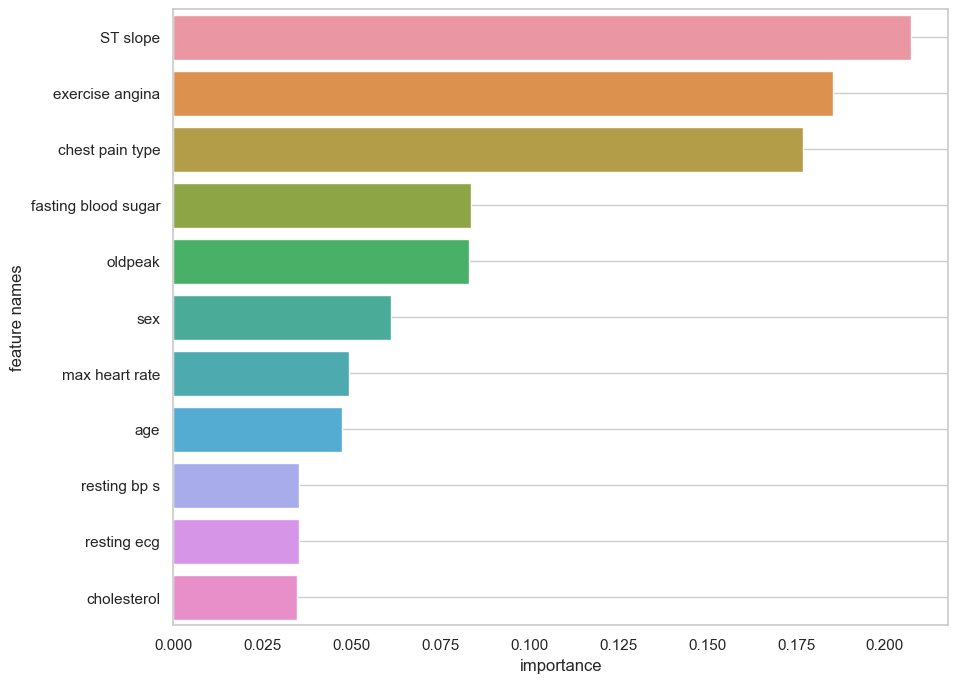

In [194]:
result1 = plot_feature_importance(model.feature_importances_, list(X_train))

In [195]:
from sklearn.metrics import roc_curve, roc_auc_score


def get_roc_auc(model, X_val_encoded, y_val):
    if isinstance(model, XGBClassifier):
        try:
            # 조기 종료가 사용된 경우
            y_pred_proba = model.predict_proba(
                X_val_encoded, iteration_range=(0, model.best_iteration)
            )[:, 1]
        except AttributeError:
            # 조기 종료가 사용되지 않은 경우
            y_pred_proba = model.predict_proba(X_val_encoded)[:, 1]
    else:
        y_pred_proba = model.predict_proba(X_val_encoded)[:, 1]

    print("ROC-AUC:", roc_auc_score(y_val, y_pred_proba))

    baseline_fpr, baseline_tpr, _ = roc_curve(y_val, [0] * len(y_val))
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    tmp = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds': thresholds})
    plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline")
    plt.plot(fpr, tpr, color="blue", label="Model")
    plt.scatter(fpr, tpr, color="red")
    plt.legend()
    plt.title("ROC curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    return tmp

ROC-AUC: 0.9565276828434723


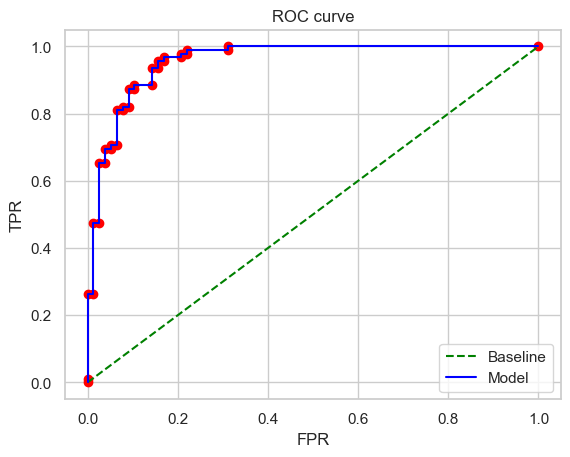

,fpr,tpr,thresholds
0,0.000000,0.000000,inf
1,0.000000,0.010526,0.991610
2,0.000000,0.263158,0.952769
3,0.012987,0.263158,0.952108
4,0.012987,0.473684,0.925702
5,0.025974,0.473684,0.925612
6,0.025974,0.652632,0.871127
7,0.038961,0.652632,0.864317
8,0.038961,0.694737,0.854923
9,0.051948,0.694737,0.842579


In [196]:
get_roc_auc(model, X_val, y_val)

In [197]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model_s = make_pipeline(
    StandardScaler(),
    XGBClassifier(
    booster = "dart",
    max_depth=3, 
    learning_rate=0.1, 
    n_estimators=100, 
    subsample=0.8, 
    colsample_bytree=0.6,
    colsample_bylevel=0.7,
    colsample_bynode=0.8,
    cuda="gpu",
    device="gpu",
    objective='binary:logistic',
    sample_type="weighted"
    ))


model_s.fit(X_train, y_train)
pred_1_s = model_s.predict(X_val)
print(confusion_matrix(y_val, pred_1_s))
print(classification_report(y_val, pred_1_s))

[[66 11]
 [ 6 89]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        77
           1       0.89      0.94      0.91        95

    accuracy                           0.90       172
   macro avg       0.90      0.90      0.90       172
weighted avg       0.90      0.90      0.90       172



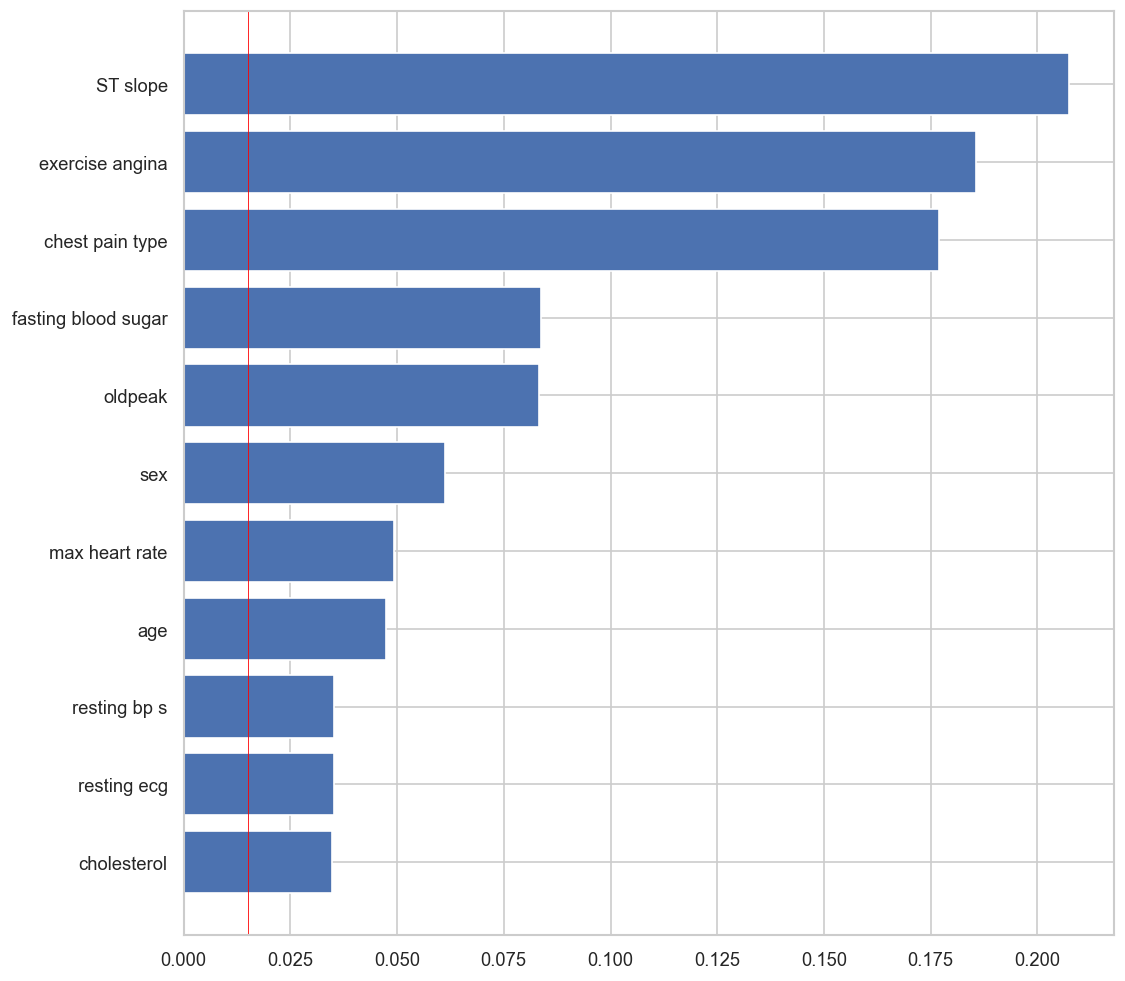

In [198]:
feature_importances = list(
    zip(X_train.columns, model.feature_importances_)
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 10), dpi=120)
plt.barh(*list(zip(*feature_importances[::-1])))
plt.axvline(0.015, color="red", linewidth=0.5)

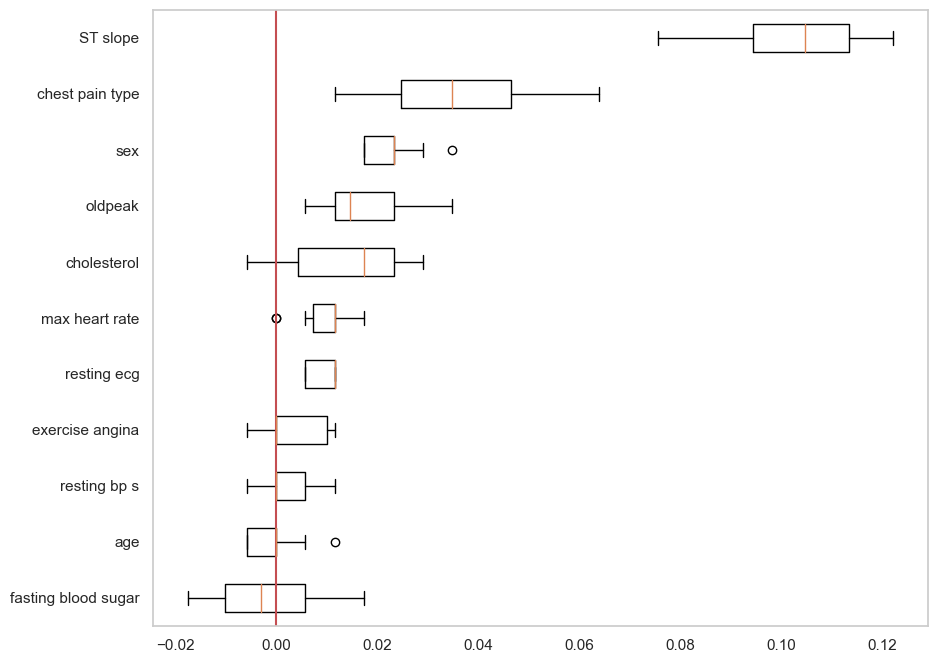

In [199]:
from sklearn.inspection import permutation_importance

pfi1 = permutation_importance(model, X_val, y_val, n_repeats=10, 
                              scoring = 'accuracy', random_state=20)

sorted_idx = pfi1.importances_mean.argsort()
plt.figure(figsize = (10, 8))
plt.boxplot(pfi1.importances[sorted_idx].T, vert=False, labels=X_train.columns[sorted_idx])
plt.axvline(0, color = 'r')
plt.grid()
plt.show()

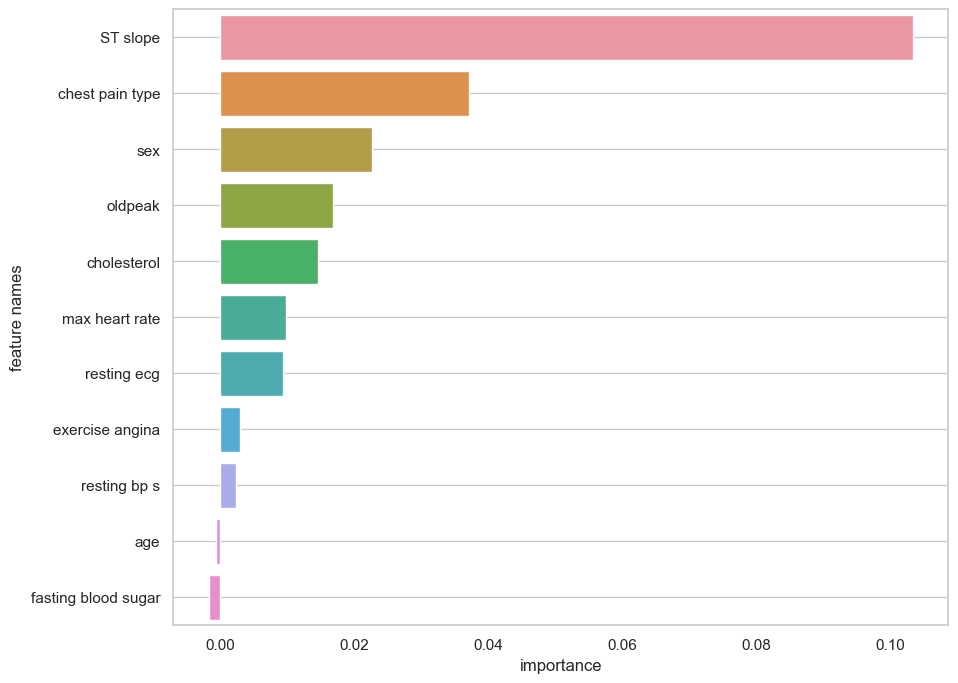

In [200]:
result2 = plot_feature_importance(pfi1.importances_mean, list(X_train))

In [201]:
def summarize_results(model, X_val_encoded, y_val):
    # 1. Train / Val Loss Plot
    if isinstance(model, XGBClassifier):
        results = model.evals_result()
        tgts = results["validation_0"].keys()

        for tgt in tgts:
            train_error = results["validation_0"][tgt]
            val_error = results["validation_1"][tgt]

            plt.plot(train_error, label="Train")
            plt.plot(val_error, label="Validation")
            plt.ylabel(tgt)
            plt.xlabel("Model Complexity (n_estimators)")
            plt.legend()
            plt.show()

    # 2. Accuracy / Classification Report
    print("검증 정확도", model.score(X_val_encoded, y_val))

    if isinstance(model, XGBClassifier):
        y_pred = model.predict(X_val_encoded, iteration_range=(0, model.best_iteration))
    else:
        y_pred = model.predict(X_val_encoded)

    print(classification_report(y_val, y_pred))

    # 3. ROC-AUC
    get_roc_auc(model, X_val_encoded, y_val)

    # 4. Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_val_encoded, y_val,cmap='Blues')
    plt.show()

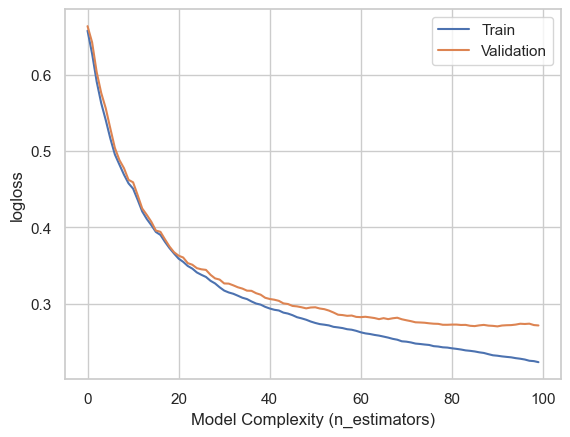

검증 정확도 0.9011627906976745
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        77
           1       0.89      0.94      0.91        95

    accuracy                           0.90       172
   macro avg       0.90      0.90      0.90       172
weighted avg       0.90      0.90      0.90       172

ROC-AUC: 0.9565276828434723


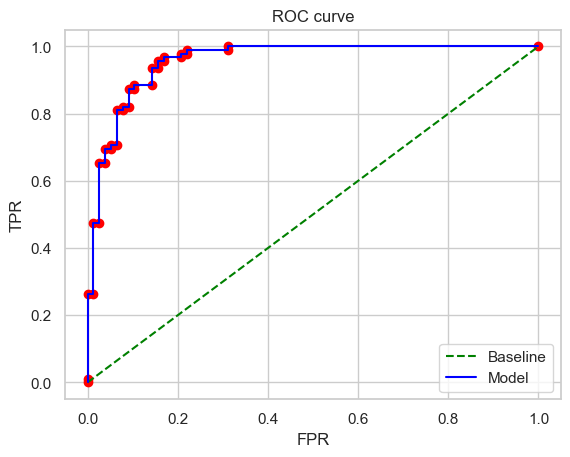

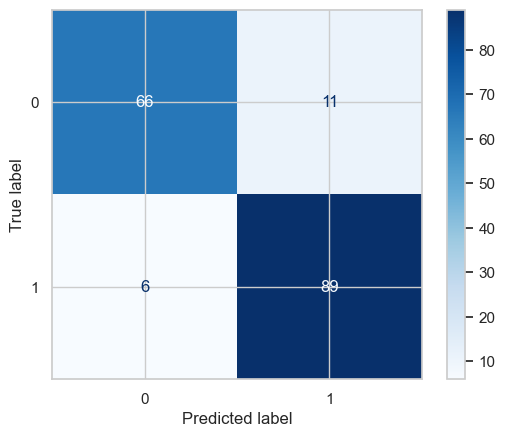

In [202]:
summarize_results(model, X_val, y_val)

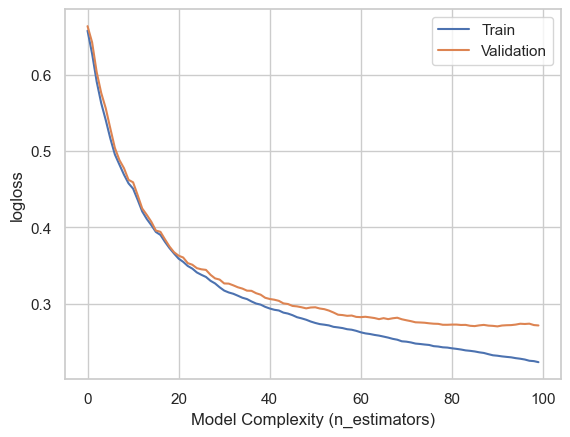

검증 정확도 0.8777292576419214
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       103
           1       0.87      0.91      0.89       126

    accuracy                           0.88       229
   macro avg       0.88      0.87      0.88       229
weighted avg       0.88      0.88      0.88       229

ROC-AUC: 0.9381260594852827


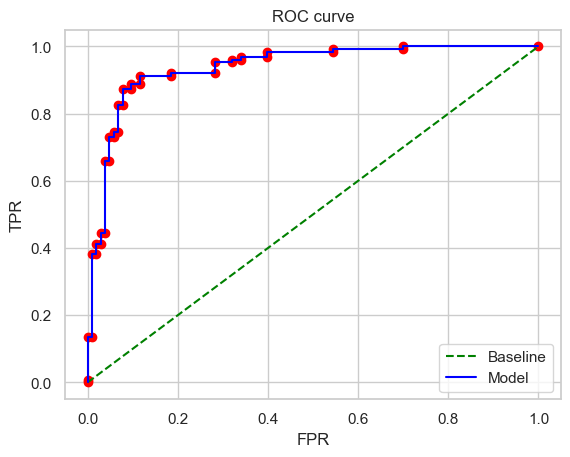

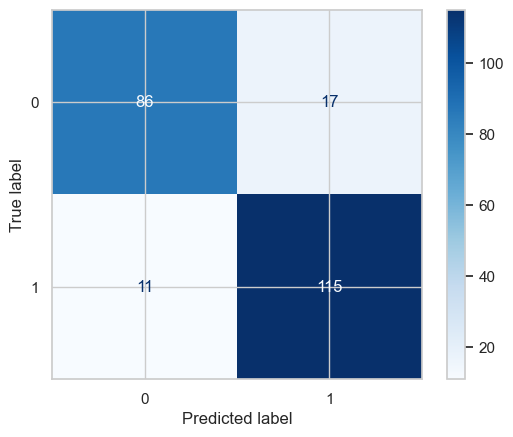

In [203]:
summarize_results(model, X_test, y_test)